### Artificial Intelligence.

#### Oscar Hernández Terán. Geophysical engineer.

This program

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

## 1. Define the problem

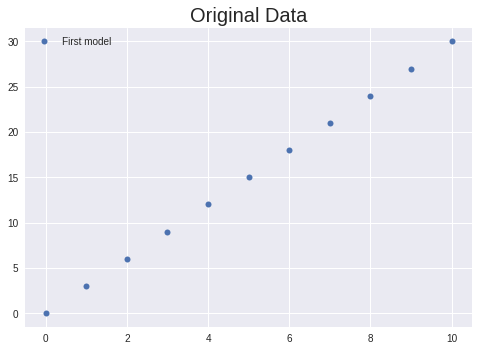

In [17]:
# We define our domain
x = np.linspace(0,10,11)

# Use a random number like example
m_r = 3
y = m_r*x

# Plot 
plt.plot(x,y, '.', label='First model', markersize=12)
plt.title('Original Data', fontsize=20)
plt.legend()
plt.show()

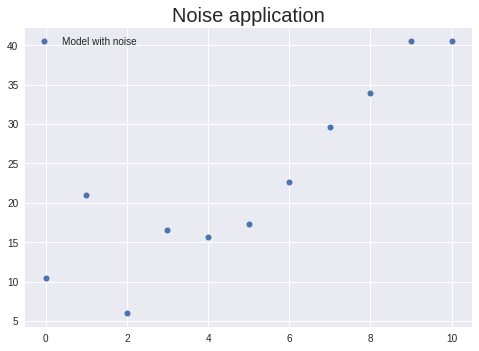

In [18]:
# For recreated the data we use a numpy seed
np.random.seed(1)

# We add noise to our data
y_n = np.zeros(len(x))
for i in range(len(x)):
    y_n[i]=  y[i] + np.random.rand(1)*25

# Plot 
plt.plot(x, y_n, '.', label='Model with noise', markersize=12)
plt.title('Noise application', fontsize=20)
plt.legend()
plt.show()

## 2. Define a regression model

$$y = f(x,\theta) $$ 
$$ f(x,\theta)  = w \cdot x $$ where $\theta =\{w\}$

## 3. Define cost function $C$
We define the function of the sum of squared differences divided by 2 as the cost function. 

$C(\theta) = \frac{1}{2} \sum_{i=1}^m (y_i-w \cdot x_i)^2 $

## 3.1 Target function

$$ \underset{\theta}{\text{minimize}} \text{ } C(\theta)$$

## 4 Algorithm 

#### Gradient descent

### 4.1 We compute the derivate for the algorithm

$$\frac{\delta C(\theta) }{\delta \theta} = - \sum_{i=1}^m (y_i-w \cdot x_i) x_i$$


In [6]:
# Initialize parameters
w = 0.

# Value of w 
m_s = list([w])

# Learning rate 
lr = 0.001

# Define a top limit for iterations
lim = 100000

for it in range(lim):
    
    # Compute the partial derivate
    # Initialize partial derivate
    grad = 0.
    
    # For each tuple of the data set (x_I,y_i) do
    for i in np.arange(len(x)):
        dif = -0.5*(y_n[i]-w*x[i])*x[i]
        grad = grad + dif
    
    # Update parameter w
    w -= lr*grad
    m_s.append(w)

print("Estimation")
print("w =",m_s[-1])
print("Real")
print("w =",m_r)

Estimation
w = 4.196635675296147
Real
w = 3


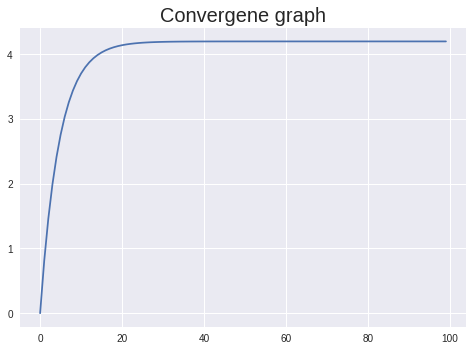

In [19]:
# Convergence graph
plt.plot(m_s[:100])
plt.title('Convergene graph', fontsize=20)
plt.show()

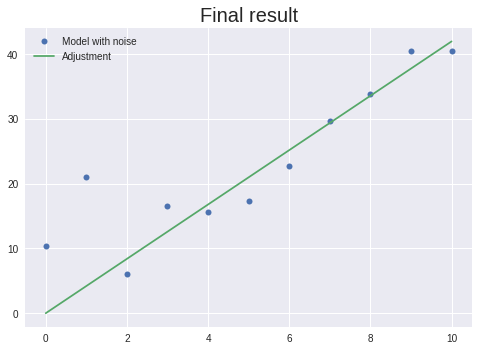

In [21]:
Adjustment = m_s[-1] * x

plt.plot(x, y_n, '.', label='Model with noise', markersize=12)
plt.plot(x, Adjustment, label='Adjustment')
plt.legend()
plt.title('Final result', fontsize=20)
plt.show()

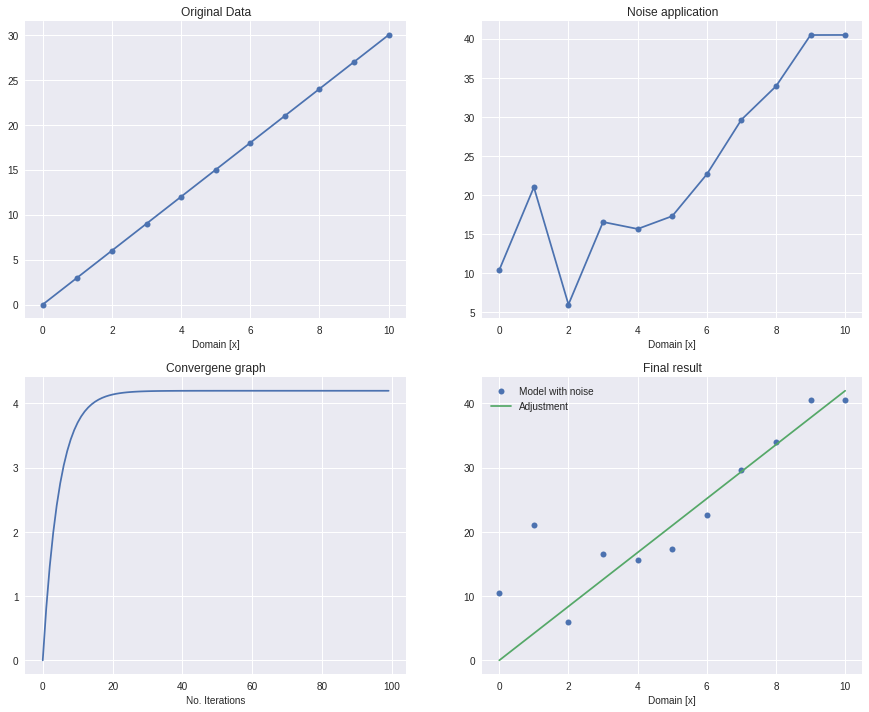

In [36]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
plt.plot(x,y, '.-', label='First model', markersize=12)
plt.title('Original Data', fontsize=12)
plt.xlabel('Domain [x]', fontsize=10)

plt.subplot(2,2,2)
plt.plot(x, y_n, '.-', label='Model with noise', markersize=12)
plt.title('Noise application', fontsize=12)
plt.xlabel('Domain [x]', fontsize=10)

plt.subplot(2,2,3)
plt.plot(m_s[:100])
plt.title('Convergene graph', fontsize=12)
plt.xlabel('No. Iterations', fontsize=10)

plt.subplot(2,2,4)
plt.plot(x, y_n, '.', label='Model with noise', markersize=12)
plt.plot(x, Adjustment, label='Adjustment')
plt.legend()
plt.title('Final result', fontsize=12)
plt.xlabel('Domain [x]', fontsize=10)

plt.show()